In [1]:
import numpy as np
from cosmoTransitions import generic_potential_1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize,stats
import scipy.integrate as integrate
import random
import seaborn as sns
from scipy import interpolate, special

plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size
pd.set_option('display.max_rows', None)
thick_size=16
label_size=20

####Some definitions##
v2 = 246.2**2
mh=125.09
v=246.2
alpha=1/137
sinthw=np.sqrt(0.223)
g1=np.sqrt(4*np.pi*alpha/(1-sinthw**2)) ##U(1)_Y gauge coupling (also the electron charge in dimensionless units)
g=np.sqrt(4*np.pi*alpha)/sinthw
Mplanck=2.4*10**18
cs=1/3**0.5 ##Sound speed constant
del alpha


####This code uses an interpoaltion function for the number of degrees of freedom as function of temperature
###Data is obtained from https://member.ipmu.jp/satoshi.shirai/EOS2018
data = np.loadtxt( 'satoshi_dof.dat' )
Temperature_d=(data.T)[0][900:3900]
dof_d=(data.T)[1][900:3900]
#f = interpolate.interp1d(Temperature_d, dof_d)###"""the function works from T=[10e-4,1000]"""
g_star = interpolate.interp1d(Temperature_d, dof_d, kind='cubic')




In [10]:
df12=pd.read_csv("SCANS/scan_cluster_0/On_Shell_12.csv",index_col=[0])
df13=pd.read_csv("SCANS/scan_cluster_0/On_Shell_13.csv",index_col=[0])
df14=pd.read_csv("SCANS/scan_cluster_0/On_Shell_14.csv",index_col=[0])
df15=pd.read_csv("SCANS/scan_cluster_0/On_Shell_15.csv",index_col=[0])
df16=pd.read_csv("SCANS/scan_cluster_0/On_Shell_16.csv",index_col=[0])
df17=pd.read_csv("SCANS/scan_cluster_0/On_Shell_17.csv",index_col=[0])
df18=pd.read_csv("SCANS/scan_cluster_0/On_Shell_18.csv",index_col=[0])
df19=pd.read_csv("SCANS/scan_cluster_0/On_Shell_19.csv",index_col=[0])
df20=pd.read_csv("SCANS/scan_cluster_0/On_Shell_20.csv",index_col=[0])
df21=pd.read_csv("SCANS/scan_cluster_0/On_Shell_21.csv",index_col=[0])
df22=pd.read_csv("SCANS/scan_cluster_0/On_Shell_22.csv",index_col=[0])
df23=pd.read_csv("SCANS/scan_cluster_0/On_Shell_23.csv",index_col=[0])
df24=pd.read_csv("SCANS/scan_cluster_0/On_Shell_24.csv",index_col=[0])
df25=pd.read_csv("SCANS/scan_cluster_0/On_Shell_25.csv",index_col=[0])
df26=pd.read_csv("SCANS/scan_cluster_0/On_Shell_26.csv",index_col=[0])
df27=pd.read_csv("SCANS/scan_cluster_0/On_Shell_27.csv",index_col=[0])
df28=pd.read_csv("SCANS/scan_cluster_0/On_Shell_28.csv",index_col=[0])
df29=pd.read_csv("SCANS/scan_cluster_0/On_Shell_29.csv",index_col=[0])
df30=pd.read_csv("SCANS/scan_cluster_0/On_Shell_30.csv",index_col=[0])
df31=pd.read_csv("SCANS/scan_cluster_0/On_Shell_31.csv",index_col=[0])
df32=pd.read_csv("SCANS/scan_cluster_0/On_Shell_32.csv",index_col=[0])
df33=pd.read_csv("SCANS/scan_cluster_0/On_Shell_33.csv",index_col=[0])
df34=pd.read_csv("SCANS/scan_cluster_0/On_Shell_34.csv",index_col=[0])
df35=pd.read_csv("SCANS/scan_cluster_0/On_Shell_35.csv",index_col=[0])
df36=pd.read_csv("SCANS/scan_cluster_0/On_Shell_36.csv",index_col=[0])
df37=pd.read_csv("SCANS/scan_cluster_0/On_Shell_37.csv",index_col=[0])
df38=pd.read_csv("SCANS/scan_cluster_0/On_Shell_38.csv",index_col=[0])
df39=pd.read_csv("SCANS/scan_cluster_0/On_Shell_39.csv",index_col=[0])
df40=pd.read_csv("SCANS/scan_cluster_0/On_Shell_40.csv",index_col=[0])
df41=pd.read_csv("SCANS/scan_cluster_0/On_Shell_41.csv",index_col=[0])
df42=pd.read_csv("SCANS/scan_cluster_0/On_Shell_42.csv",index_col=[0])
df43=pd.read_csv("SCANS/scan_cluster_0/On_Shell_43.csv",index_col=[0])


df_total=pd.concat([df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,
           df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,df37,df38,df39,
           df40,df41,df42,df43])

df_total=df_total[df_total.alpha_max>1e-4]
#df_total=df_total[df_total.alpha_max<1e-0]
df_total=df_total[df_total.num_FOPT>=1]
#df_total=df_total[df_total.lams>.5]
#df_total=df_total[df_total.lams<1]
#df_total=df_total[df_total.lamh>.75]
#df_total=df_total[df_total.lamh<.8]

df=df_total
len(df)

5121

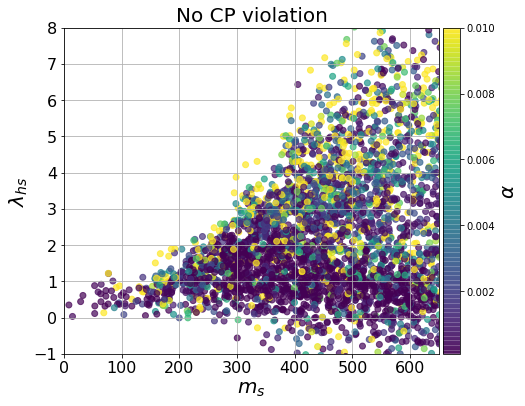

In [16]:


plt.scatter(df.ms,df.lammix,c=df.alpha_0,alpha=.7)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')
plt.clim(1e-4,.01)
plt.xlim(0,650)
plt.ylim(-1,8)
plt.grid(True)
plt.xlabel("$m_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("No CP violation",size=label_size)
plt.show()

In [373]:
dphi0=((df['h_low_0']-df['h_high_0'])**2+1*(df['s_low_0']-df['s_high_0'])**2)**.5
dphi1=((df['h_low_1']-df['h_high_1'])**2+1*(df['s_low_1']-df['s_high_1'])**2)**.5
dphi2=((df['h_low_2']-df['h_high_2'])**2+1*(df['s_low_2']-df['s_high_2'])**2)**.5
df["dphi0"]=dphi0
df["dphi1"]=dphi1
df["dphi2"]=dphi2
dphi_max=df[["dphi0","dphi1","dphi2"]].apply(max,axis=1)
df["dphi_max"]=dphi_max

In [374]:
df.columns


Index(['ms', 'theta', 'u', 'muhs', 'mu3', 'lamh', 'lams', 'lammix', 'muh2',
       'mus2', 'Pih', 'Pis', 'lamh_tilde', 'th_bool', 'h_low_0', 's_low_0',
       'h_high_0', 's_high_0', 'Tnuc_0', 'dT_0', 'alpha_0', 'vwf_0', 'xi_J_0',
       'v_calculable_0', 'num_FOPT', 'alpha_max', 'dT_max', 'tran_type',
       'h_low_1', 's_low_1', 'h_high_1', 's_high_1', 'Tnuc_1', 'dT_1',
       'alpha_1', 'vwf_1', 'xi_J_1', 'v_calculable_1', 'h_low_2', 's_low_2',
       'h_high_2', 's_high_2', 'Tnuc_2', 'dT_2', 'alpha_2', 'vwf_2', 'xi_J_2',
       'v_calculable_2', 'h_low_3', 's_low_3', 'h_high_3', 's_high_3',
       'Tnuc_3', 'dT_3', 'alpha_3', 'vwf_3', 'xi_J_3', 'v_calculable_3',
       'dphi0', 'dphi1', 'dphi2', 'dphi_max'],
      dtype='object')

In [375]:
Columns=['ms', 'theta', 'u', 'muhs', 'mu3', 'lamh', 'lams', 'lammix', 'muh2',
       'mus2', 'Pih', 'Pis', 'lamh_tilde',"alpha_max","dT_max","dphi_max"]

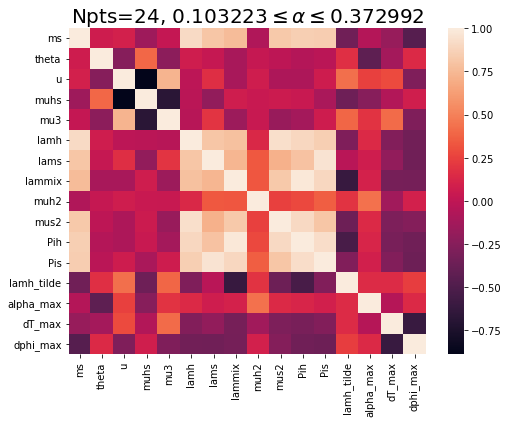

In [376]:

sns.heatmap(df[Columns].corr())
title="Npts="+str(len(df))+", "+str(round(df.alpha_max.min(),6))+"$\leq \\alpha \leq$"+str(round(df.alpha_max.max(),6))
plt.title(title,size=label_size)
plt.show()

In [377]:
stats.pearsonr(df['lammix'], df['alpha_max'])

(0.1034543522809558, 0.6304745089402808)

In [271]:
abs(df.corr()["alpha_max"])>.2



ms            False
theta         False
u             False
muhs          False
mu3           False
lamh          False
lams           True
lammix         True
muh2          False
mus2          False
Pih            True
Pis            True
lamh_tilde    False
th_bool       False
h_low_0        True
s_low_0       False
h_high_0      False
s_high_0      False
Tnuc_0         True
dT_0           True
alpha_0        True
vwf_0          True
xi_J_0         True
num_FOPT      False
alpha_max      True
dT_max         True
h_low_1        True
s_low_1       False
h_high_1      False
s_high_1      False
Tnuc_1        False
dT_1           True
alpha_1        True
vwf_1          True
xi_J_1         True
h_low_2        True
s_low_2       False
h_high_2       True
s_high_2      False
Tnuc_2         True
dT_2           True
alpha_2        True
vwf_2          True
xi_J_2         True
h_low_3       False
s_low_3       False
h_high_3      False
s_high_3      False
Tnuc_3        False
dT_3          False


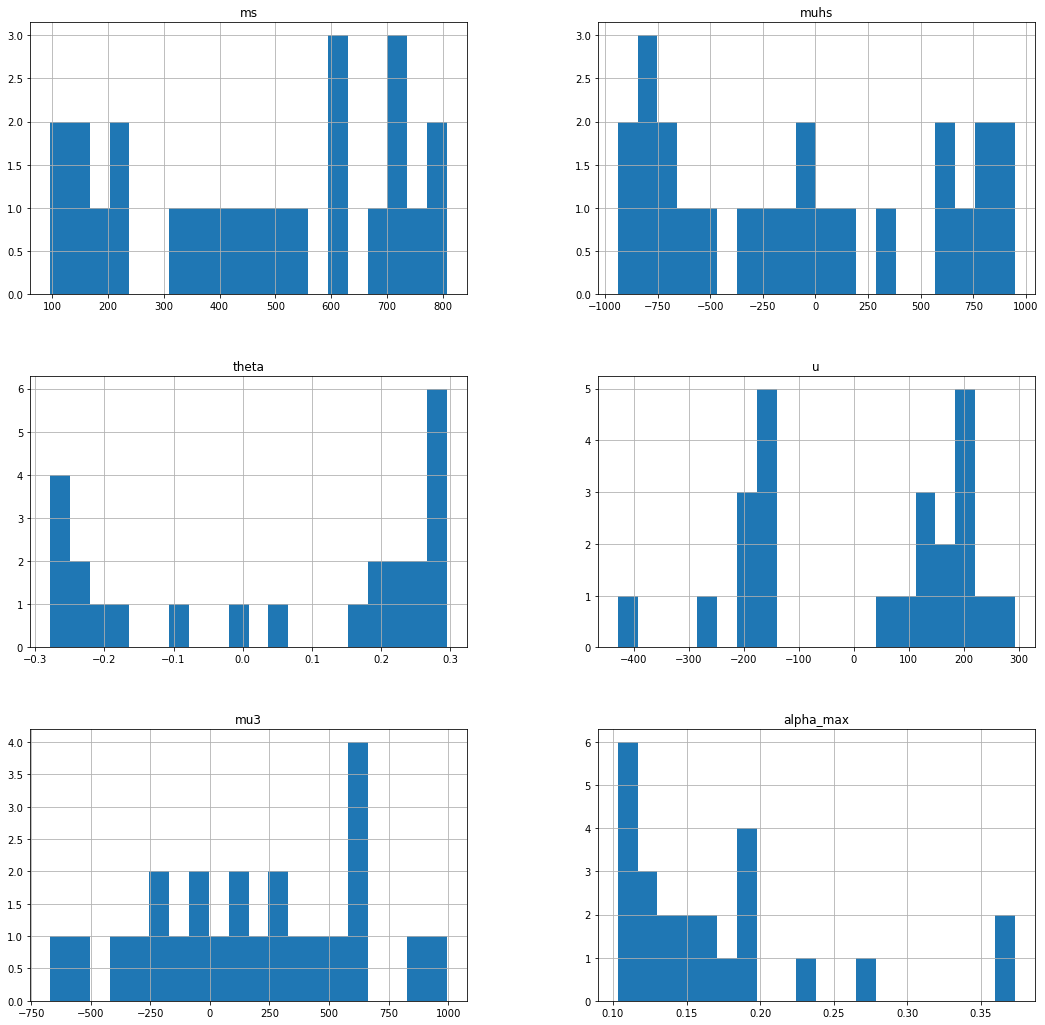

In [380]:
df[["ms","muhs","theta","u","mu3","alpha_max"]].hist(figsize=(18,18),bins=20)
plt.show()

In [386]:
mydict=[{"apple":2,"pear":3}]
pd.DataFrame(mydict)

,apple,pear
0,2,3


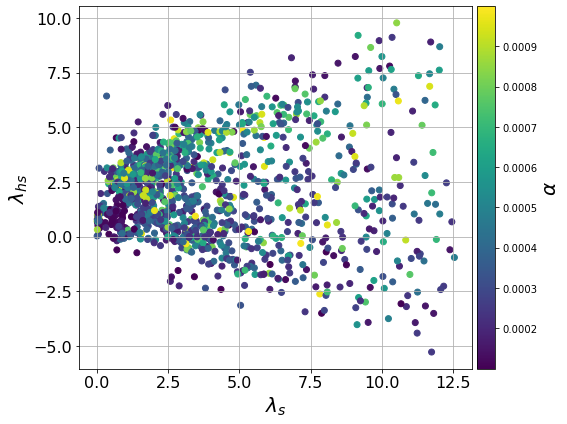

In [170]:

plt.scatter(df.lams,df.lammix,c=(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$\\lambda_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

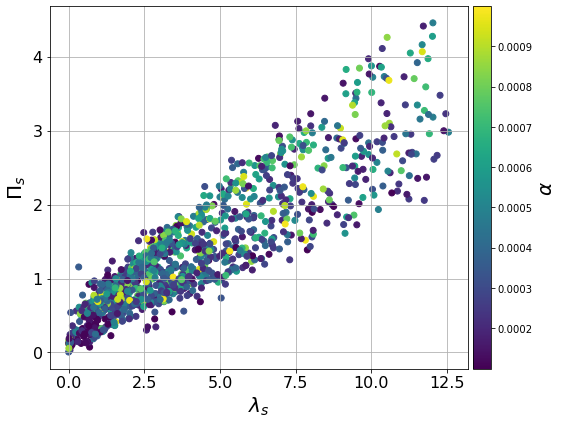

In [171]:

plt.scatter(df.lams,df.Pis,c=(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$\\lambda_s$",size=label_size)
plt.ylabel("$\\Pi_s$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

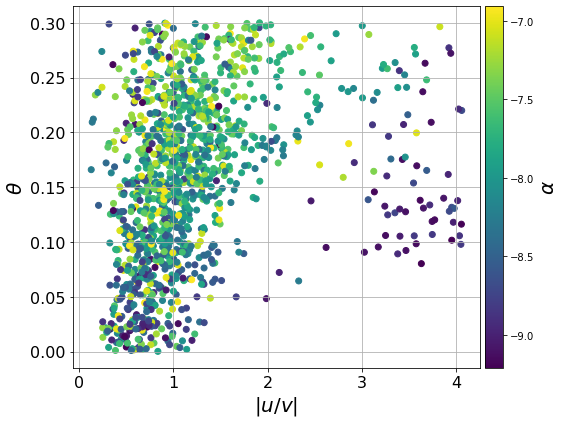

In [172]:
plt.scatter(abs(df.u/v),abs(df.theta),c=np.log(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$|u/v|$",size=label_size)
plt.ylabel("$\\theta$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

In [153]:
df=df.sort_values("alpha_max")
modi=-6
[ms_val,u_val,muhs_val,mu3_val]=df.iloc[modi].ms,df.iloc[modi].u,df.iloc[modi].muhs,df.iloc[modi].mu3

In [154]:
ms_range=np.logical_and(df.ms<ms_val*(1+np.sign(ms_val)*.1),df.ms>ms_val*(1-np.sign(ms_val)*.1))
#u_range=np.logical_and(df.u<u_val*(1+np.sign(u_val)*.5),df.u>u_val*(1-np.sign(u_val)*.5))
muhs_range=np.logical_and(df.muhs<muhs_val*(1+np.sign(muhs_val)*.1),df.muhs>muhs_val*(1-np.sign(muhs_val)*.1))
mu3_range=np.logical_and(df.mu3<mu3_val*(1+np.sign(mu3_val)*.9),df.mu3>mu3_val*(1-np.sign(mu3_val)*.9))

logical_1=np.logical_and(ms_range,muhs_range)
logical_2=np.logical_and(logical_1,mu3_range)


In [155]:
sum(ms_range),sum(muhs_range),sum(mu3_range)

(2064, 1101, 8735)

In [156]:
len(df[logical_2])

112

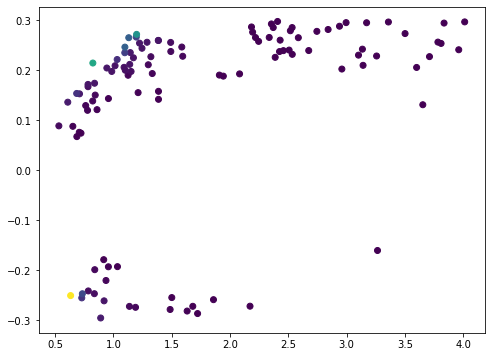

In [157]:
plt.scatter(df[logical_2].u/v,df[logical_2].theta,c=df[logical_2].alpha_max)

In [22]:
# df1=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new1.csv",index_col=[0])
# df2=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new2.csv",index_col=[0])
# df3=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new3.csv",index_col=[0])
# df4=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new4.csv",index_col=[0])
# df5=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new5.csv",index_col=[0])
# df6=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new6.csv",index_col=[0])
# df7=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new7.csv",index_col=[0])
# df8=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new8.csv",index_col=[0])
# df9=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new9.csv",index_col=[0])
# df10=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new10.csv",index_col=[0])

df11=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new11.csv",index_col=[0])
df12=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new12.csv",index_col=[0])
df13=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new13.csv",index_col=[0])
df14=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new14.csv",index_col=[0])
df15=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new15.csv",index_col=[0])
df16=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new16.csv",index_col=[0])
df17=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new17.csv",index_col=[0])
df18=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new18.csv",index_col=[0])
df19=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new19.csv",index_col=[0])
df20=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new20.csv",index_col=[0])
df21=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new21.csv",index_col=[0])
df22=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new22.csv",index_col=[0])
df23=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new23.csv",index_col=[0])
df24=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new24.csv",index_col=[0])
df25=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new25.csv",index_col=[0])
df26=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new26.csv",index_col=[0])
df27=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new27.csv",index_col=[0])
df28=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new28.csv",index_col=[0])
df29=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new29.csv",index_col=[0])
df30=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new30.csv",index_col=[0])
df31=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new31.csv",index_col=[0])
df32=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new32.csv",index_col=[0])
df33=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new33.csv",index_col=[0])
df34=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new34.csv",index_col=[0])
df35=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new35.csv",index_col=[0])
df36=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new36.csv",index_col=[0])
df37=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new37.csv",index_col=[0])
df38=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new38.csv",index_col=[0])
df39=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new39.csv",index_col=[0])
df40=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new40.csv",index_col=[0])
df41=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new41.csv",index_col=[0])
df42=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new42.csv",index_col=[0])
df43=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new43.csv",index_col=[0])
df44=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new44.csv",index_col=[0])
df45=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new45.csv",index_col=[0])
df46=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new46.csv",index_col=[0])
df47=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new47.csv",index_col=[0])
df48=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new48.csv",index_col=[0])
df49=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new49.csv",index_col=[0])
df50=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new50.csv",index_col=[0])

df_total=pd.concat([df12,df13,df14,df15,df16,df17,df18,df19,df20,
                    df21,df22,df23,df24,df26,df27,df28,df29,
                    df30,df31,df32,df33,df34,df35,df36,df37,df38,
                    df39,df40,df41,df42,df43,df44,df45,df46,df47,
                    df48,df49,df50])
df_total=df_total[df_total["vel_converged"]==True]

df=df_total

In [25]:
#df=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_All.csv",index_col=[0])
#df=df_total
#df=df[['Lam_CP', 'Tnuc_0', 'Tp/TN', 'vw', 'vp', 'h0', 'Lh', 'Ls', 'ds','shigh', 'slow', 'alpha_p', 'ms']]
#df.to_csv("SCANS/computeBAU.csv")

#df_BAU = pd.read_csv('SCANS/BAU/BAU_top_fullmodel_3.csv', names=["eta_bau"], header=None)
#df=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_All.csv",index_col=[0])
#df["eta_BAU"]=list(df_BAU.eta_bau)

#df.to_csv("SCANS/BAU/sols_fullmodel_2.csv")


#BAUcolumns=['ms', 'theta', 'u', 'muhs', 'mu3', 'lamh', 'lams', 'lammix',
#            'Tc_0','Tmin_0', 'Tnuc_0','alpha_Tp_0','beta_Tp_0',"volume_shrinks_0",
#            'vw','Lh', 'dh', 'h0', 'Ls', 'ds', 'shigh', 'slow',
#            'Type', 'alpha_p', 'vm', 'vp', 'xi_s', 'Tp/TN', 'vel_converged','yt','Lam_CP','eta_BAU']

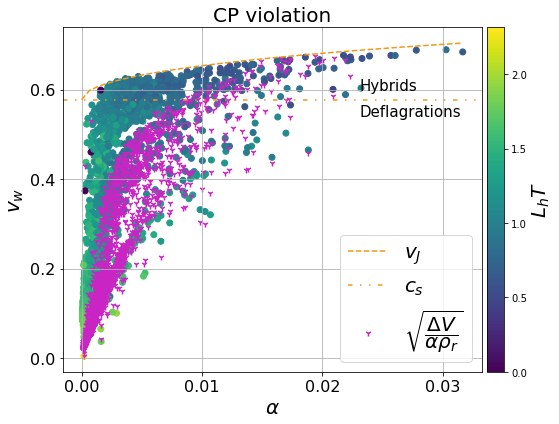

In [249]:

df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
v_J=lambda alpha_p:((alpha_p*(2+3*alpha_p))**0.5+1)/(3**0.5*(1+alpha_p))
al_range=np.linspace(0,df.alpha_max.max())



thick_size=16
label_size=20
#plt.rcParams['text.usetex'] = True

plt.scatter(df.alpha_0,df.vw,c=np.log10(df.Lh*df.Tnuc_0))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$L_h T$", size=label_size, weight='bold')
#plt.plot(df.alpha_0,df.xi_J_0,c="#f09917",label="$v_J$",linestyle="--")
plt.plot(al_range,v_J(al_range),c="#f09917",label="$v_J$",linestyle="--")
df=df[df.vwf_0<=df.xi_J_0]
plt.scatter(df.alpha_0,df.vwf_0,c="#CA25C4",marker="1",label="$\\sqrt{\dfrac{\\Delta V}{\\alpha \\rho_r}}$")

plt.axhline(y=cs,linestyle=(0, (3, 5, 1, 5, 1, 5)),c="#f09917",label="$c_s$")
plt.figtext(.63, .78, "Hybrids", fontsize=15)
plt.figtext(.63, .72, "Deflagrations", fontsize=15)

plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$v_w$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

plt.legend(prop={'size': label_size})
plt.title("CP violation",size=label_size)
plt.grid(True)

plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

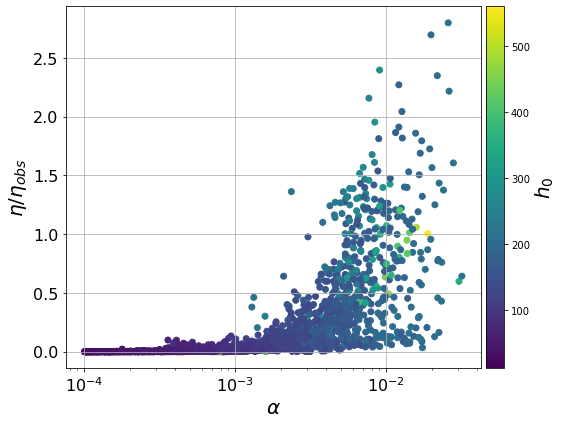

In [267]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]

plt.scatter(df.alpha_max,df.eta_BAU,c=df.h0)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
plt.xscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT1.pdf', dpi=300)

plt.show()

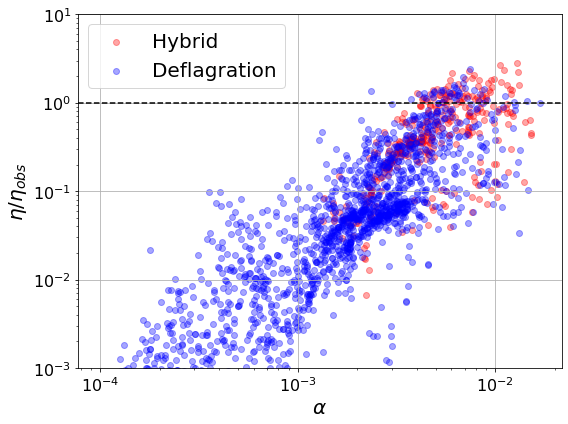

In [268]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]

df["Type_bool"]=list(df.Type=="Hybrid")
plt.scatter(df[df.Type=="Hybrid"].alpha_p,df[df.Type=="Hybrid"].eta_BAU,color="red",alpha=.35,label="Hybrid")
plt.scatter(df[df.Type=="Deflagration"].alpha_p,df[df.Type=="Deflagration"].eta_BAU,color="Blue",alpha=.35,label="Deflagration")
plt.ylim(1e-3,10)
plt.axhline(y=1,linestyle="--",c="k")
plt.legend(loc="best",prop={'size': label_size})
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT2.pdf', dpi=300)
plt.show()

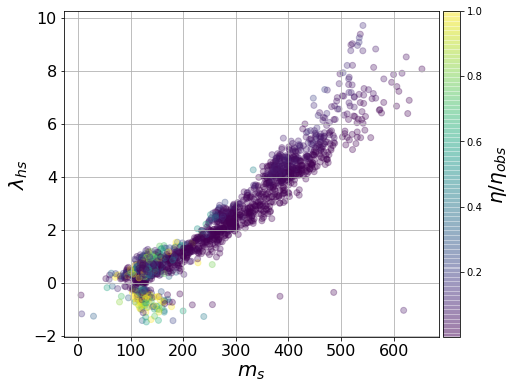

In [269]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]



plt.scatter(df.ms,df.lammix,c=df.eta_BAU,alpha=.3)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
plt.clim(1e-3,1)
plt.grid(True)
plt.xlabel("$m_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.savefig('SCANS/BAU_plots/PLOT3.pdf', dpi=300)

plt.show()


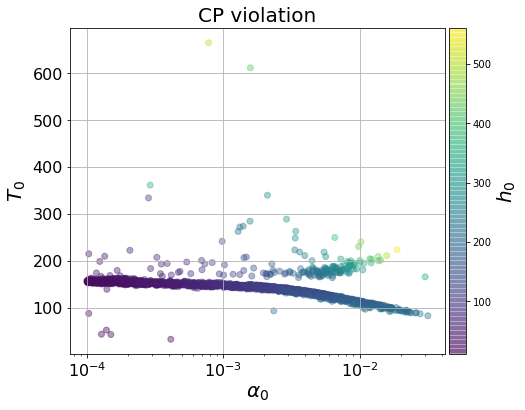

In [270]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]

plt.scatter(df.alpha_0,df.Tnuc_0,c=df.h0,alpha=.4)
plt.xscale("log")
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
#plt.clim(1e-4,.01)
plt.grid(True)
plt.xlabel("$\\alpha_0$",size=label_size)
plt.ylabel("$T_{0}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("CP violation",size=label_size)
plt.savefig('SCANS/BAU_plots/PLOT4.pdf', dpi=300)

plt.show()

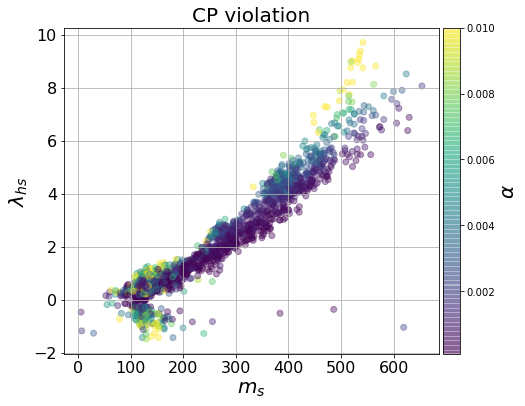

In [271]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]

plt.scatter(df.ms,df.lammix,c=df.alpha_0,alpha=.4)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')
plt.clim(1e-4,.01)
plt.grid(True)
plt.xlabel("$m_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("CP violation",size=label_size)
plt.savefig('SCANS/BAU_plots/PLOT5.pdf', dpi=300)

plt.show()

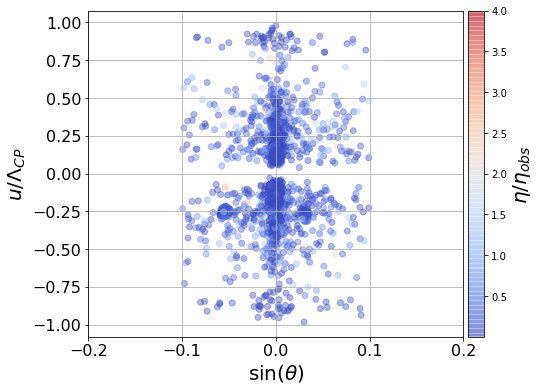

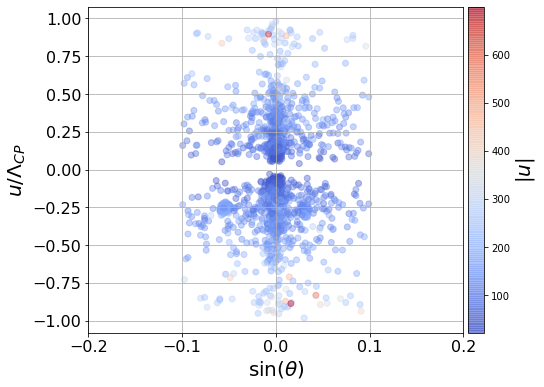

In [273]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]

plt.scatter(np.sin(df.theta),df.u/df.Lam_CP,c=df.eta_BAU,alpha=.4,cmap="coolwarm")
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
plt.clim(1e-4,4)
plt.grid(True)
plt.xlim(-.2,.2)
plt.xlabel("$\sin(\\theta)$",size=label_size)
plt.ylabel("$u/\\Lambda_{CP}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.locator_params(axis="x",nbins=4)
plt.yticks(fontsize=thick_size)
plt.show()



plt.scatter(np.sin(df.theta),df.u/df.Lam_CP,c=abs(df.u),alpha=.4,cmap=plt.get_cmap("coolwarm",500))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$|u|$", size=label_size, weight='bold')
#plt.clim(1e-3,1)
plt.grid(True)
plt.xlim(-.2,.2)
plt.xlabel("$\sin(\\theta)$",size=label_size)
plt.ylabel("$u/\\Lambda_{CP}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.locator_params(axis="x",nbins=4)
plt.yticks(fontsize=thick_size)
plt.savefig('SCANS/BAU_plots/PLOT7.pdf', dpi=300)
plt.show()

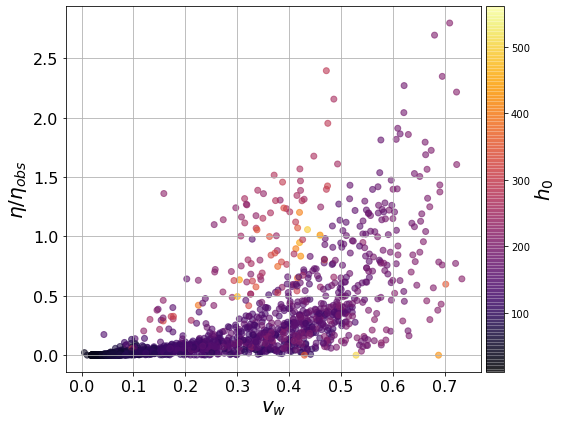

In [257]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]

plt.scatter(df.vwf_0,df.eta_BAU,c=df.h0,alpha=.6,cmap="inferno")
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
#plt.clim(10,300)
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
#plt.xscale("log")
#plt.yscale("log")
#plt.xlim(1e-1,1)
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$v_w$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
#plt.savefig('SCANS/BAU_plots/BAU_vw.pdf', dpi=300)
plt.show()

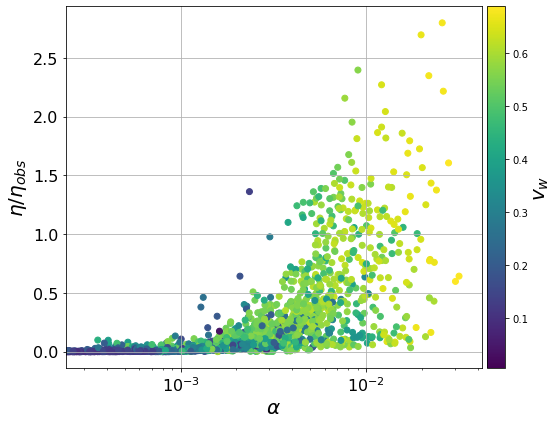

In [258]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]

plt.scatter(df.alpha_0,df.eta_BAU,c=df.vw)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$v_w$", size=label_size, weight='bold')
#plt.clim(10,300)
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
plt.xscale("log")
#plt.yscale("log")
#plt.yscale("log")
plt.xlim(2.4e-4,)
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
plt.tight_layout()
#plt.savefig('SCANS/BAU_plots/BAU_vw.pdf', dpi=300)
plt.show()

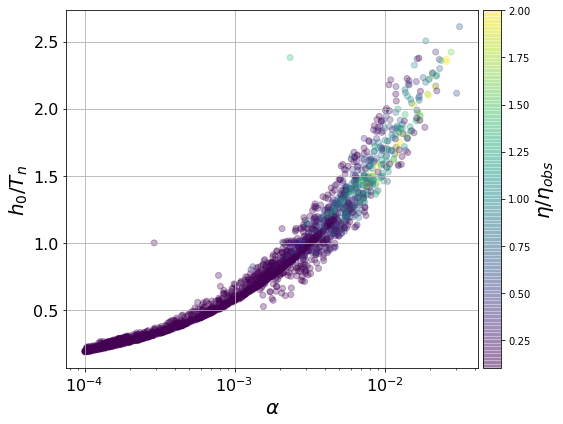

In [272]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df["sphaleron"]=df.h0/df.Tnuc_0

plt.scatter(df.alpha_max,df.sphaleron,c=df.eta_BAU,alpha=0.3)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\eta/\\eta_{obs}$", size=label_size, weight='bold')
plt.clim(1e-1,2)
plt.xscale("log")
#plt.xlim(4e-4,4e-2)
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$h_0/T_n$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT6.pdf', dpi=300)
plt.show()


In [173]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
df=pd.concat([df0,df1,df2])


df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.alpha_0>1e-4]
df["sphaleron"]=df.h0/df.Tnuc_0



corr_columns=['ms', 'theta', 'u', 'muhs', 'mu3', 'yt', 'lamh', 'lams', 'lammix',
              'muh2', 'mus2', 'Pih', 'Pis', 'lamh_tilde', 'Lam_CP', 
              'h_low_0', 's_low_0', 'h_high_0', 's_high_0',
              'Tnuc_0', 'dT_0', 'alpha_0', 'vwf_0', 'xi_J_0', 'alpha_max', 'dT_max', 
              'vw', 'Lh', 'h0', 'Ls', 'ds', 'shigh', 'slow', 'alpha_p', 'vm', 'vp', 'xi_s', 'Tp/TN', 'Tc',
              'LT', 'eta_BAU',"sphaleron"]
df_correlation=df[corr_columns].corr()
abs(df_correlation["vw"]).sort_values()

Ls            0.005351
s_high_0      0.023047
shigh         0.024809
muhs          0.043638
Lam_CP        0.048859
h_high_0      0.056176
lamh_tilde    0.062239
mu3           0.062498
theta         0.071808
Pih           0.081115
yt            0.081498
lammix        0.116447
lamh          0.127786
u             0.132895
slow          0.137073
s_low_0       0.139140
lams          0.168621
Pis           0.171023
Tc            0.172138
ds            0.208349
ms            0.243161
mus2          0.270884
muh2          0.274588
Tnuc_0        0.328249
eta_BAU       0.542723
xi_s          0.585521
dT_0          0.651207
dT_max        0.651349
alpha_max     0.662089
alpha_0       0.665001
h0            0.685317
alpha_p       0.692964
Tp/TN         0.694278
h_low_0       0.747176
Lh            0.753088
sphaleron     0.763391
xi_J_0        0.823773
LT            0.852681
vwf_0         0.914016
vp            0.988400
vm            0.997412
vw            1.000000
Name: vw, dtype: float64